In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\sande\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - accuracy: 0.3497 - loss: 1.7562 - val_accuracy: 0.5506 - val_loss: 1.2667
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5668 - loss: 1.2167 - val_accuracy: 0.6248 - val_loss: 1.0627
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 47ms/step - accuracy: 0.6451 - loss: 1.0119 - val_accuracy: 0.6633 - val_loss: 0.9737
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.6817 - loss: 0.9035 - val_accuracy: 0.6764 - val_loss: 0.9312
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.7094 - loss: 0.8347 - val_accuracy: 0.6839 - val_loss: 0.9272
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 40ms/step - accuracy: 0.7391 - loss: 0.7564 - val_accuracy: 0.6858 - val_loss: 0.9238
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7561 - loss: 0.7049 - val_accuracy: 0.7073 - val_loss: 0.8687
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7685 -

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 3s - 9ms/step - accuracy: 0.7183 - loss: 0.8531
Test accuracy: 0.7182999849319458


In [9]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [10]:
def plot_image(pred_index, predictions_array, true_label, img):
    true_label, img = true_label[pred_index], img[pred_index]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"Predicted: {class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%)\nTrue: {class_names[true_label[0]]}", color=color)

In [11]:
def predict_and_plot_image(index):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(index, predictions[index], test_labels, test_images)
    
    plt.subplot(1,2,2)
    plot_value_array(index, predictions[index], test_labels)
    plt.show()

In [12]:
def plot_value_array(pred_index, predictions_array, true_label):
    true_label = true_label[pred_index]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=45)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [13]:
def find_image_by_class(target_class):
    for i in range(len(test_labels)):
        if test_labels[i][0] == target_class:
            return i
    return -1

In [18]:
target_class = 7  
image_index = find_image_by_class(target_class)

TypeError: only integer scalar arrays can be converted to a scalar index

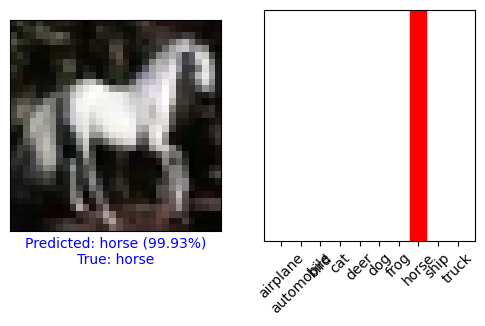

In [19]:
if image_index != -1:
    predict_and_plot_image(image_index)
else:
    print("Image not found for the specified class.")